In [1]:
import axelrod as axl
import nashpy as nash
import numpy as np
import matplotlib.pyplot as plt

In [2]:
first_tournament_participants_ordered_by_reported_rank = [s() for s in axl.axelrod_first_strategies]

In [3]:
tournament = axl.Tournament(
     players=first_tournament_participants_ordered_by_reported_rank,
     turns=200,
     repetitions=5,
     seed=1,
)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 105.06it/s]


In [4]:
results.ranked_names

['First by Stein and Rapoport: 0.05: (D, D)',
 'First by Grofman',
 'First by Shubik',
 'Tit For Tat',
 'First by Nydegger',
 'First by Tideman and Chieruzzi: (D, D)',
 'Grudger',
 'First by Davis: 10',
 'First by Graaskamp: 0.05',
 'First by Downing',
 'First by Feld: 1.0, 0.5, 200',
 'First by Tullock',
 'First by Joss: 0.9',
 'First by Anonymous',
 'Random: 0.5']

In [5]:
A = np.array(results.payoff_matrix)
ipd = nash.Game(A, A.T)

In [6]:
ipd

Bi matrix game with payoff matrices:

Row player:
[[3.     2.975  3.     3.     3.     2.975  3.     3.     2.625  2.985
  1.409  1.14   1.469  2.217  2.238 ]
 [3.     2.98   3.02   3.004  3.     2.98   3.     3.     2.975  1.165
  1.297  1.076  1.325  2.824  2.836 ]
 [3.     2.97   3.     3.     3.     2.97   3.     3.     2.757  0.075
  2.22   2.658  2.718  1.57   1.52  ]
 [3.     2.974  3.     3.     3.     2.974  3.     3.     3.056  0.472
  2.088  2.383  2.428  1.995  2.129 ]
 [3.     2.975  3.     3.     3.     2.975  3.     3.     3.316  1.285
  1.343  1.331  1.413  2.802  2.648 ]
 [3.     2.98   3.02   3.004  3.     2.98   3.     3.     2.63   2.525
  1.375  1.191  1.685  2.873  2.928 ]
 [3.     2.975  3.     3.     3.     2.975  3.     3.     2.043  1.055
  1.173  1.111  1.315  3.033  2.967 ]
 [3.     2.975  3.     3.     3.     2.975  3.     3.     2.047  1.045
  1.271  1.121  1.215  3.003  2.915 ]
 [2.625  2.775  3.162  2.676  1.846  2.605  1.383  1.382  1.5    3.143
  1.463

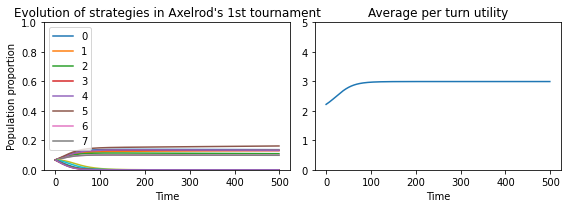

In [7]:
timepoints = np.linspace(0, 25, 500)
xs = ipd.replicator_dynamics(timepoints=timepoints)

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

ax = axarr[0]
for i, x in enumerate(zip(*xs)):
    if x[-1] > 10 ** -2:
        ax.plot(x, label=f"{i}")
    else:
        ax.plot(x)
ax.set_ylim(0, 1)
ax.set_title("Evolution of strategies in Axelrod's 1st tournament")
ax.set_xlabel("Time")
ax.set_ylabel("Population proportion")
ax.legend()

ax = axarr[1]
ax.plot(np.sum([x * (A @ x) for x in xs], axis=1))
ax.set_ylim(0, 5)
ax.set_xlabel("Time")
ax.set_title("Average per turn utility")

fig.tight_layout()